In [30]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import itertools

# import os
# os.chdir(os.getcwd() + '/..')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
def get_model_type(result_file_prefix):
  parts = result_file_prefix.split('_')
  
  if len(parts) == 1:
    emb_type = agg_type = '--'
    if parts[0] == 'random':
      model = 'random'
    else:
      model = 'random-10'
  elif len(parts) == 3:
    emb_type, agg_type = parts[1:]
    if parts[0][0] == 'k':
      model = f'KLSum$(\ell={parts[0][-1:]})$' 
    elif parts[0] == 'nosumm':
      model = 'no-summ'
    elif parts[0] == 'nosumm10':
      model = 'no-summ-10'
    elif parts[0][0] == 't':
      model = f'T5$(f={parts[0][-3:]})$'
    else:
      raise Exception("cannot happen")
  else:
    raise Exception("cannot happen")
  
  return model, emb_type, agg_type


In [32]:
get_model_type('klsum1_w2v_avg')

('KLSum$(\\ell=1)$', 'w2v', 'avg')

In [33]:
get_model_type('t50.1_w2v_avg')

('T5$(f=0.1)$', 'w2v', 'avg')

In [34]:
def get_results(result_file_prefix):
  df = pd.DataFrame()
  for i in range(3):
    df = pd.concat([df, pd.read_csv(f'../out/{result_file_prefix}_epoch{i}.csv', names=['recall@10', 'recall@50', 'NDCG@100', 'playlist_id'])]) 
  df = df.astype({'playlist_id': int})
  df = df.groupby('playlist_id').mean()
  model, emb_type, agg_type = get_model_type(result_file_prefix)
  df['model'] = model
  df['emb_type'] = emb_type
  df['agg_type'] = agg_type
  return df

In [35]:
get_results('klsum1_w2v_avg')

,recall@10,recall@50,NDCG@100,model,emb_type,agg_type
playlist_id,,,,,,
1000016,0.0,0.0,0.0,KLSum$(\ell=1)$,w2v,avg
1000020,0.0,0.0,0.0,KLSum$(\ell=1)$,w2v,avg
1000062,0.0,0.0,0.0,KLSum$(\ell=1)$,w2v,avg
1000067,0.0,0.0,0.0,KLSum$(\ell=1)$,w2v,avg
1000068,0.0,0.0,0.0,KLSum$(\ell=1)$,w2v,avg
...,...,...,...,...,...,...
1049224,0.0,0.0,0.0,KLSum$(\ell=1)$,w2v,avg
1049269,0.0,0.0,0.0,KLSum$(\ell=1)$,w2v,avg
1049300,0.0,0.0,0.0,KLSum$(\ell=1)$,w2v,avg


In [36]:
def get_all_results():
  df = pd.DataFrame()

  df = pd.concat([df, get_results('klsum1_w2v_avg')])
  df = pd.concat([df, get_results('klsum2_w2v_avg')])
  df = pd.concat([df, get_results('klsum3_w2v_avg')])
  df = pd.concat([df, get_results('klsum2_bert_avg')])
  df = pd.concat([df, get_results('klsum2_bert_sum')])
  df = pd.concat([df, get_results('klsum2_w2v_sum')])
  
  df = pd.concat([df, get_results('t50.1_w2v_avg')])
  df = pd.concat([df, get_results('t50.2_w2v_avg')])
  df = pd.concat([df, get_results('t50.3_w2v_avg')])

  df = pd.concat([df, get_results('random')])
  df = pd.concat([df, get_results('random10')])

  df = pd.concat([df, get_results('nosumm_w2v_avg')])
  df = pd.concat([df, get_results('nosumm10_w2v_avg')])
  df = pd.concat([df, get_results('nosumm10_w2v_sum')])
  df = pd.concat([df, get_results('nosumm10_bert_avg')])
  df = pd.concat([df, get_results('nosumm10_bert_sum')])
  return df

In [37]:
df = get_all_results()
df

,recall@10,recall@50,NDCG@100,model,emb_type,agg_type
playlist_id,,,,,,
1000016,0.000000,0.0,0.000000,KLSum$(\ell=1)$,w2v,avg
1000020,0.000000,0.0,0.000000,KLSum$(\ell=1)$,w2v,avg
1000062,0.000000,0.0,0.000000,KLSum$(\ell=1)$,w2v,avg
1000067,0.000000,0.0,0.000000,KLSum$(\ell=1)$,w2v,avg
1000068,0.000000,0.0,0.000000,KLSum$(\ell=1)$,w2v,avg
...,...,...,...,...,...,...
1049224,0.066667,0.2,0.178889,no-summ-10,bert,sum
1049269,0.000000,0.0,0.000000,no-summ-10,bert,sum
1049300,0.000000,0.0,0.000000,no-summ-10,bert,sum


In [38]:
df1 = df[((df['emb_type'] == 'w2v') | (df['emb_type'] == '--')) & ((df['agg_type'] == 'avg') | (df['agg_type'] == '--'))]
df1.groupby(['model', 'emb_type', 'agg_type']).mean()

,,,recall@10,recall@50,NDCG@100
model,emb_type,agg_type,,,
KLSum$(\ell=1)$,w2v,avg,0.004027,0.011032,0.010250
KLSum$(\ell=2)$,w2v,avg,0.003888,0.013310,0.010656
KLSum$(\ell=3)$,w2v,avg,0.003136,0.012877,0.011696
T5$(f=0.1)$,w2v,avg,0.002284,0.009485,0.010469
T5$(f=0.2)$,w2v,avg,0.002371,0.009464,0.010871
T5$(f=0.3)$,w2v,avg,0.002473,0.010163,0.011889
no-summ,w2v,avg,0.004756,0.017319,0.016911
no-summ-10,w2v,avg,0.005763,0.017616,0.014732
random,--,--,0.000674,0.002889,0.004854


In [39]:
dfx = df[((df['emb_type'] == 'w2v') | (df['emb_type'] == '--')) & ((df['agg_type'] == 'avg') | (df['agg_type'] == '--'))]
m = dfx.groupby('model').mean()
m['recall@10'].shape

(10,)

In [40]:
def plot_means(df, outfile, vmin=0, vmax=1, figsize=(8, 5)):
  plt.rcParams.update({'font.size': 17})
  plt.rcParams.update({'axes.titlepad': 20})
  plt.rcParams.update({'axes.labelsize': 17})
  plt.rcParams.update({'axes.titlesize': 20})
  plt.rcParams.update({'figure.titlesize': 20})
  plt.rcParams.update({'ytick.labelsize': 17})
  
  m = df.groupby(['model', 'emb_type', 'agg_type']).mean()  
  f, axs = plt.subplots(1, 3, figsize=figsize, sharey=True)
  
  metrics = ['recall@10', 'recall@50', 'NDCG@100']
  for i, metric in enumerate(metrics):
    ax = sns.heatmap(m[metric].to_frame(),
                      ax=axs[i],
                     vmin=m[metric].min(),
                     vmax=m[metric].max(),
                     annot=True,
                     cbar=False,
                     fmt='.2%',
                     cmap='viridis')
    ax.set_ylabel(None)
    ax.xaxis.tick_top()
    ax.tick_params(labelrotation=0, left=False, top=False)
  plt.tight_layout()
  plt.savefig(outfile, dpi=300, bbox_inches='tight')

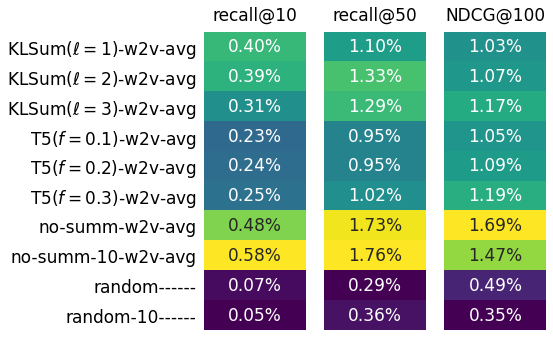

In [41]:
df_all = df[((df['emb_type'] == 'w2v') | (df['emb_type'] == '--')) & ((df['agg_type'] == 'avg') | (df['agg_type'] == '--'))]
plot_means(df_all, 'table_all.png')

In [42]:
df_best = pd.DataFrame()

maskKL1 = (df['model'] == 'KLSum$(\ell=2)$') & (df['emb_type'] == 'w2v') & (df['agg_type'] == 'avg')
maskKL2 = (df['model'] == 'KLSum$(\ell=2)$') & (df['emb_type'] == 'bert') & (df['agg_type'] == 'avg')

maskNoSumm1 = (df['model'] == 'no-summ-10') & (df['emb_type'] == 'w2v') & (df['agg_type'] == 'avg')
maskNoSumm2 = (df['model'] == 'no-summ-10') & (df['emb_type'] == 'bert') & (df['agg_type'] == 'avg')

df_best = pd.concat([df_best, df[maskKL1]])
df_best = pd.concat([df_best, df[maskKL2]])
df_best = pd.concat([df_best, df[maskNoSumm1]])
df_best = pd.concat([df_best, df[maskNoSumm2]])
df_best.groupby(['model', 'emb_type', 'agg_type']).mean()

recall@10  recall@50  NDCG@100
model           emb_type agg_type                                
KLSum$(\ell=2)$ bert     avg        0.005233   0.017304  0.015650
                w2v      avg        0.003888   0.013310  0.010656
no-summ-10      bert     avg        0.009037   0.030446  0.024547
                w2v      avg        0.005763   0.017616  0.014732

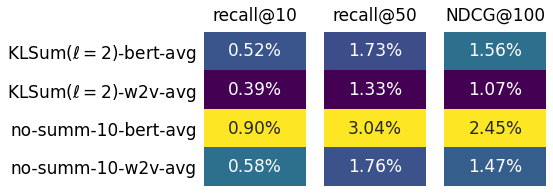

In [43]:
plot_means(df_best, 'table_best.png', figsize=(8, 3))